In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor


# Q1

As Auto1 is moving forward for b2c model, the pricing problem is a main issue to tackle, I believe that clustering cars according to their technical specs, make and milage(which is missing) might give us a deeper insights about the pricing patterns. i ran basic analysis on the variance of the price according  the make and the body type but the data scarcity was an issue. 

Also trying to bridge the gap between the dealers and engineers from one side and the data science from the other side i tried to have a decision tree regressor that shows a comprehendable results of discreete rules for classification.

may be we can have a customer recommendation system that shows the best car according to some user input that takes into consideration the average credit rating, 

Also a good approach for the customer recommendation is to denormalize the insurance cost to see the variance of the insurance cost per make. may be some cars are not safer than the others.



# Q2

I will stick to basic analysis of the data then a decision tree regressor that shows us the feature importance of the pricing scheme and it might guide our engineers and dealers in pricing the cars. 

# Q3 and Q4 - A

In [2]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [3]:
!ls

Auto1-DS-TestData.csv  graphviz_2.36.0.orig.tar.gz  tree2.png  tree5.png
graphviz-2.36.0        tree2.dot		    tree5.dot  Untitled.ipynb


In [4]:
df = pd.read_csv('Auto1-DS-TestData.csv',na_values="?")
# df['symboling'] = df['symboling'].astype(str)
df['symboling'] = df['symboling'] + 3


In [5]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,6,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,6,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,4,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,5,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,5,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,4,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,4,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,4,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,3,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


with scarce data and having a lot of missing values, i decided to complete the values from other complete data. so for every column with missing data i just do a simple regressor/ NB classifier to complete the data. With such high dimensional data and small data set i am aware of the curse of dimensionality but i believe that this is better than just filling it with averages.

In [6]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score , f1_score
from sklearn.model_selection import cross_val_score
x = ""
y = ""
missing_df = ""
corrupt_cols =  df.isna().sum() > 0 
corrupt_cols = corrupt_cols[corrupt_cols.values].index
solid_df = pd.get_dummies(df[list(set(df.columns) - set(corrupt_cols))])
len(solid_df)
for col in sorted(df.columns):
#     if df[col].dtype == 'object':
    if (any(df[col].isna())):
        print(col)
        print(len(df)-len(df[col].dropna()))
        clf = None
        if df[col].dtype == "object":
            print("labeling")
            clf = MultinomialNB()
            score = 'f1_macro'
        else :
            print('regressing')
            clf = linear_model.LinearRegression()
            score = 'r2'
        
        x = solid_df[~df[col].isna()] 
        print(x.shape)
        y = df[~df[col].isna()].loc[:, df.columns == col] 
#         df [col]
        print(any(x.isna()))
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
#         clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#         clf.score(X_test, y_test)                           
              
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        if df[col].dtype != "object":
            # The mean squared error
            print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
            # Explained variance score: 1 is perfect prediction
            print('Variance score: %.2f' % r2_score(y_test, y_pred))
        missing_df = solid_df[df[col].isna()]
        
        
        estimates = (clf.predict(missing_df))
        
        df.loc[df[col].isna(),col] = estimates
#         print(cross_val_score(clf, X_test, y_test, scoring=score))


bore
4
regressing
(201, 68)
True
Mean squared error: 0.07
Variance score: 0.24
horsepower
2
regressing
(203, 68)
True
Mean squared error: 582.96
Variance score: 0.71
normalized-losses
41
regressing
(164, 68)
True
Mean squared error: 491.43
Variance score: 0.48
num-of-doors
2
labeling
(203, 68)
True
peak-rpm
2
regressing
(203, 68)
True
Mean squared error: 162582.28
Variance score: 0.06
price
4
regressing
(201, 68)
True
Mean squared error: 3123953.48
Variance score: 0.97
stroke
4
regressing
(201, 68)
True
Mean squared error: 0.11
Variance score: 0.14


/home/asarhan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Basic analysis of the data .. chekcing for outliers

In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,3.834146,127.630808,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.311808,3.236027,10.142537,104.238106,5124.78808,25.219512,30.751220,13297.377317
std,1.245307,37.352839,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.299396,0.342566,3.972040,39.519701,477.01584,6.542142,6.886443,8116.807800
min,1.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.389776,2.070000,7.000000,48.000000,4150.00000,13.000000,16.000000,4812.961488
25%,3.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.100000,8.600000,70.000000,4800.00000,19.000000,25.000000,7775.000000
50%,4.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.00000,24.000000,30.000000,10295.000000
75%,5.000000,157.818168,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.00000,30.000000,34.000000,16503.000000
max,6.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.00000,49.000000,54.000000,45400.000000


In [8]:
text_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        text_cols.append(col)
        print(list(df[col].drop_duplicates()))
df[text_cols].describe()

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
['gas', 'diesel']
['std', 'turbo']
['two', 'four']
['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
['rwd', 'fwd', '4wd']
['front', 'rear']
['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,116,96,120,202,148,159,94


symboling


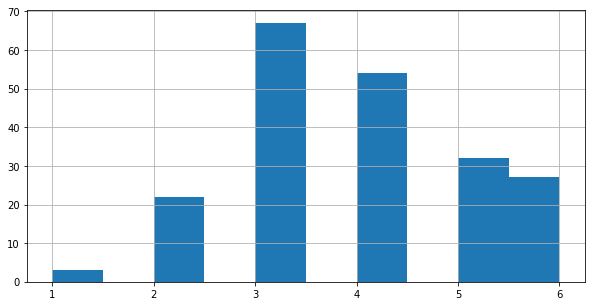

normalized-losses


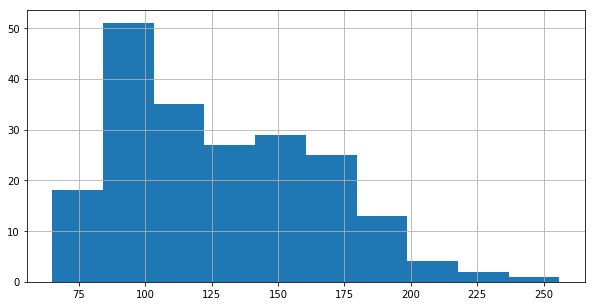

make


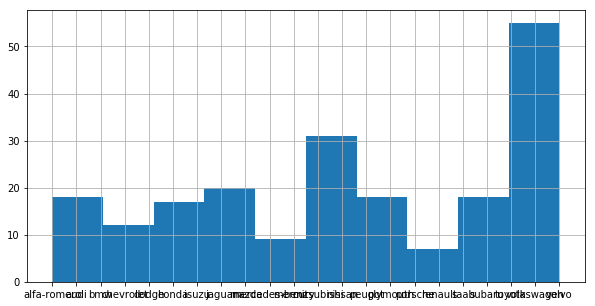

fuel-type


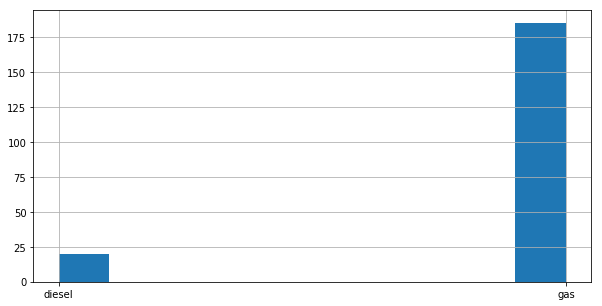

aspiration


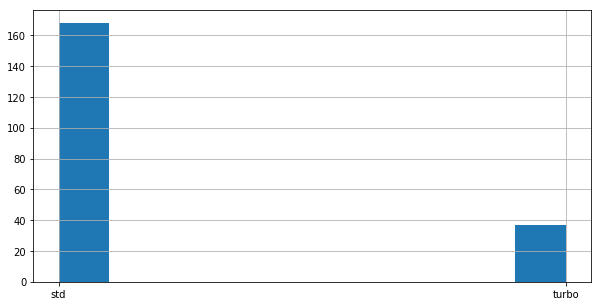

num-of-doors


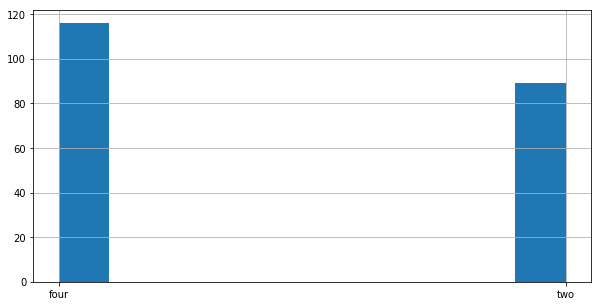

body-style


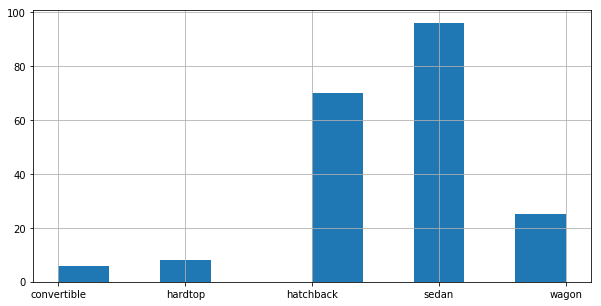

drive-wheels


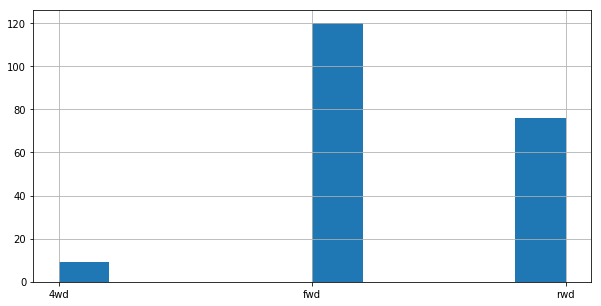

engine-location


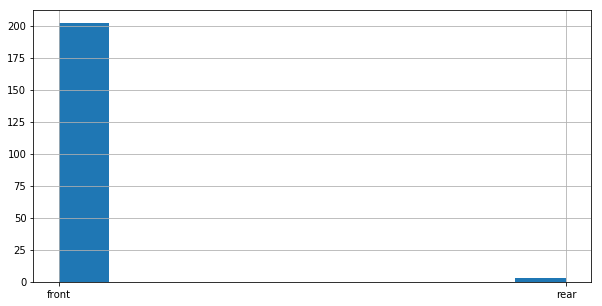

wheel-base


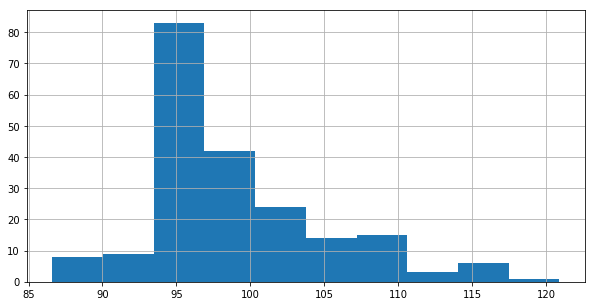

length


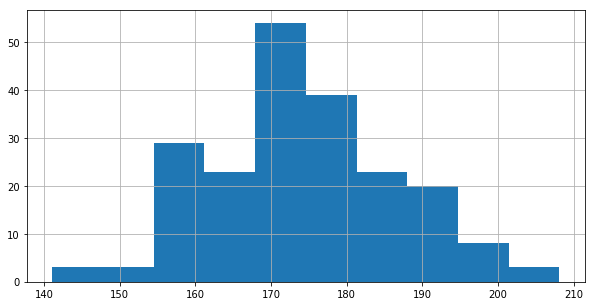

width


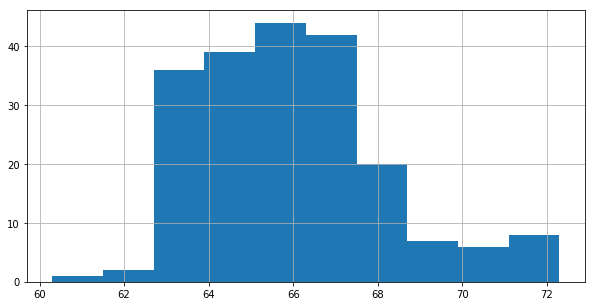

height


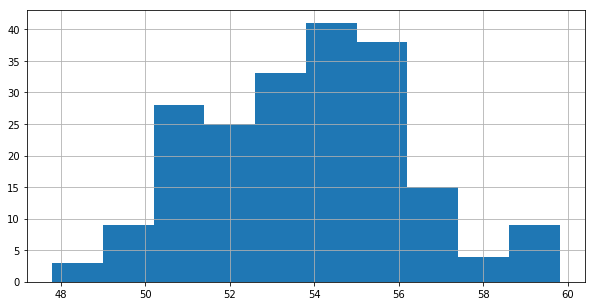

curb-weight


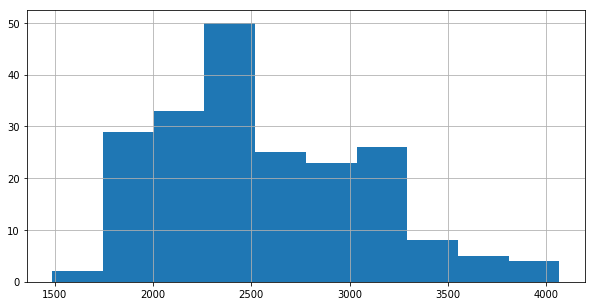

engine-type


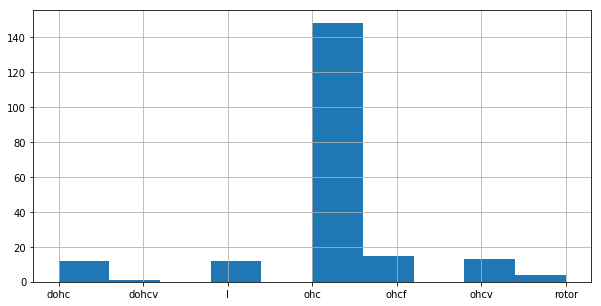

num-of-cylinders


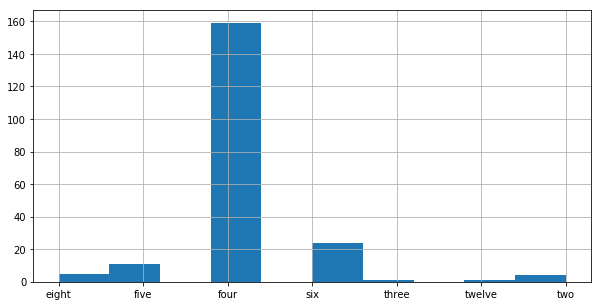

engine-size


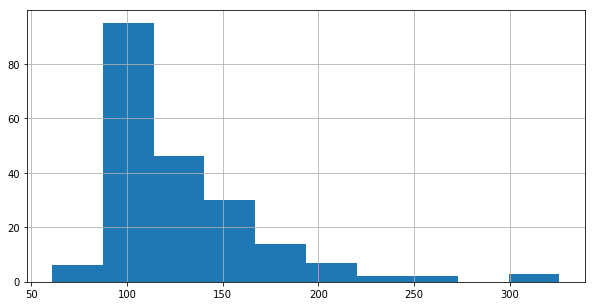

fuel-system


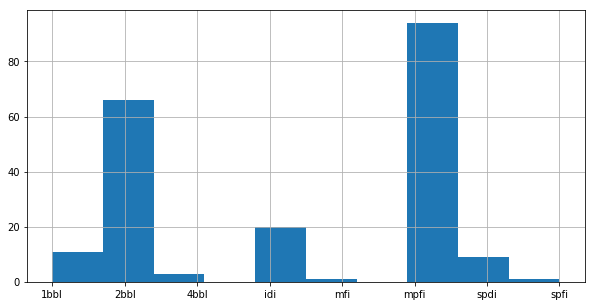

bore


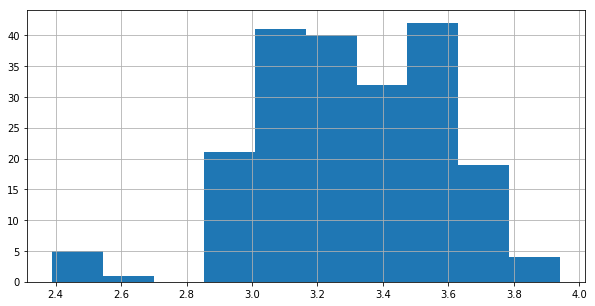

stroke


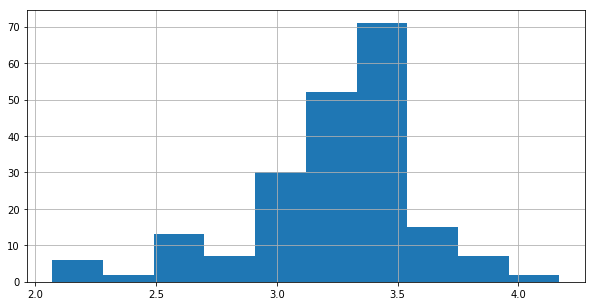

compression-ratio


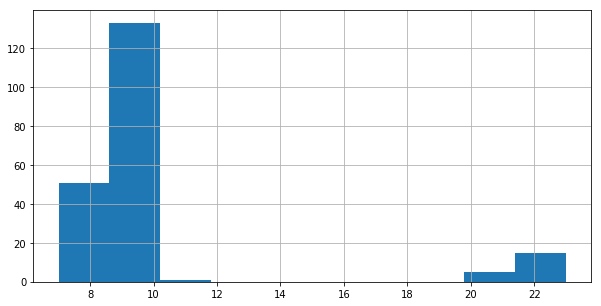

horsepower


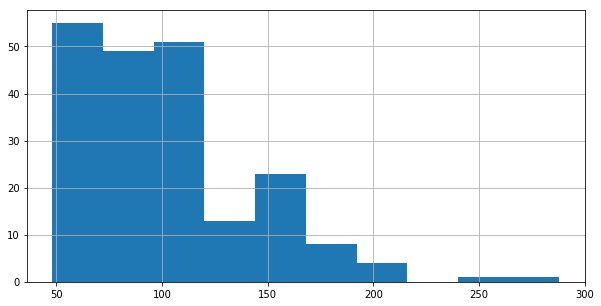

peak-rpm


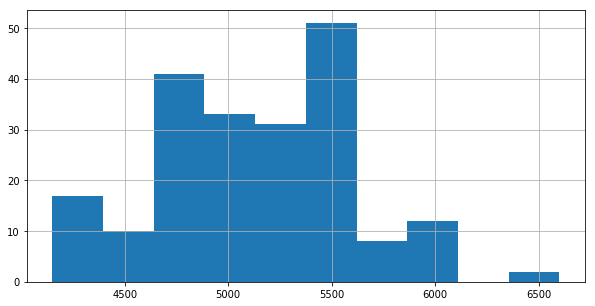

city-mpg


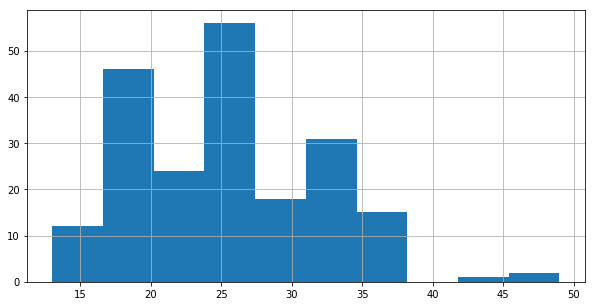

highway-mpg


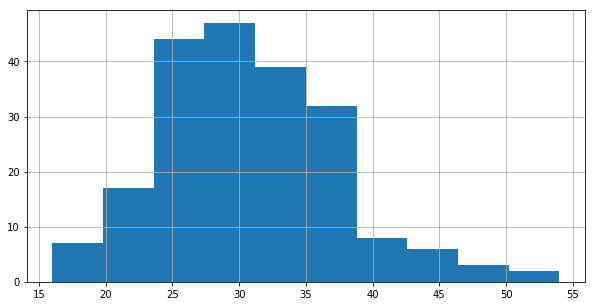

price


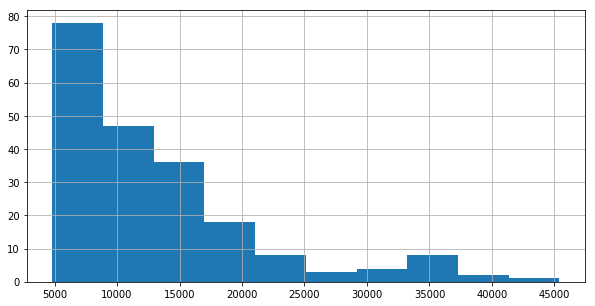

In [9]:
text_cols = []
plt.rcParams['figure.figsize'] = [10,5]

for col in df.columns:
    print(col)
    df[col].hist() 
    plt.show()


Finding some outliers in the compression ratio, taking a look in the data it looks like diesel engines have different spans of compression ratios

In [10]:
df[df['compression-ratio']>15]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
63,3,85.867992,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,3,132.881733,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,2,93.000000,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,2,93.000000,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,3,93.000000,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,2,93.000000,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,4,128.000000,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,3,161.000000,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,3,157.818168,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
112,3,161.000000,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0


Basic correlation analysis...

In [11]:
dummies_df = pd.get_dummies(df)

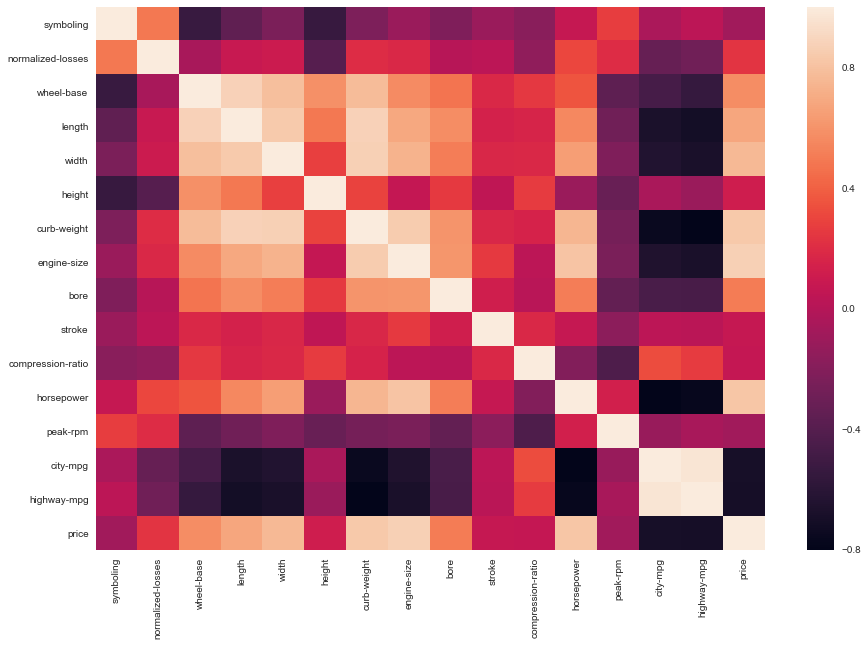

In [12]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = [15, 10]
ax = sns.heatmap(df.corr())

Having alot of dimensions, i decided to split them for having different result sets one for a basic analysis of any recommender system and the other for supporting the engineering team and the dealers

In [13]:
eng_cols = [ 'fuel-type', 'aspiration', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio' , 'peak-rpm']
insurance_cols = [ 'normalized-losses', 'aspiration', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm']

other_cols = list(set(df.columns) - set(eng_cols) )
other_cols.remove("price")

Basic analysis of makes, trying to infer which makes are traded with higher volume and which holds higher variance, which implies risk and potential profits.

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
Name: bore, dtype: int64


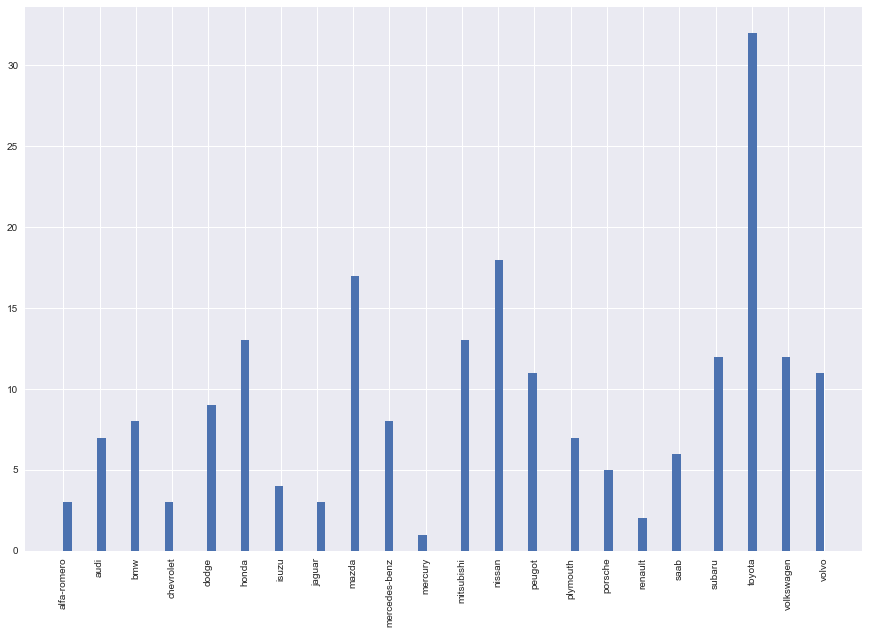

In [29]:
print(df.groupby(["make"])['bore'].count())
df["make"].sort_values().hist(bins=90)
plt.xticks(rotation=90)

plt.show()

body-style     convertible       hardtop     hatchback         sedan         wagon
make                                                                              
alfa-romero      4515012.5           NaN           NaN           NaN           NaN
audi                   NaN           NaN           NaN  1.456104e+07           NaN
bmw                    NaN           NaN           NaN  8.581858e+07           NaN
chevrolet              NaN           NaN  6.543680e+05           NaN           NaN
dodge                  NaN           NaN  9.036635e+06  8.705743e+05           NaN
honda                  NaN           NaN  1.377244e+06  4.378750e+06           NaN
isuzu                  NaN           NaN           NaN  9.940637e+05           NaN
jaguar                 NaN           NaN           NaN  4.192500e+06           NaN
mazda                  NaN           NaN  1.124711e+07  2.397348e+07           NaN
mercedes-benz          NaN  1.483331e+08           NaN  4.072475e+07           NaN
merc

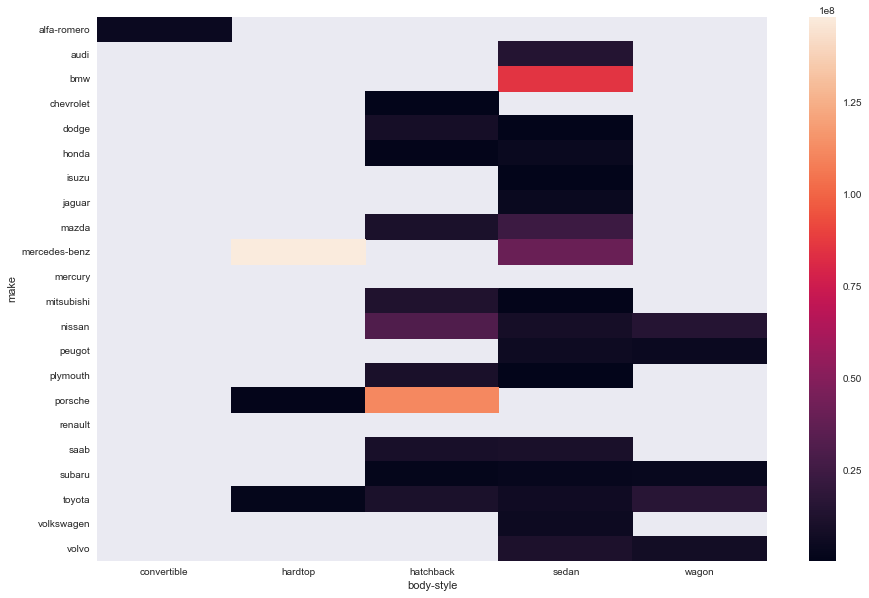

In [15]:
vpm = df.groupby(["make","body-style"])['price'].var()
print(pd.pivot_table(vpm.to_frame(),index='make', columns='body-style', values='price'))
sns.heatmap(pd.pivot_table(vpm.to_frame(),index='make', columns='body-style', values='price'))
plt.show()

basic analysis shows that mercedes with hard top might be good for trading, however without having milage data, this evidence might not be solid

Moving on to the decision tree regressors, in stead of having a guess for the parameters, i decided to go with a grid search for the most meaningfull tree.

In [39]:
from sklearn.model_selection import GridSearchCV
eng_dummy_df = pd.get_dummies(df[eng_cols])
other_dummy_df = pd.get_dummies(df[other_cols])
# Create a random dataset
other_X = other_dummy_df.loc[:] 
other_Y = df["price"] 

eng_X = eng_dummy_df.loc[:] 
eng_Y = df["price"] 
# Fit regression model
param_grid = [ 
  {'max_depth':  range(1,7), 'min_samples_split':  range(2,50,3) , "min_samples_leaf" : range(2,50,3)} 
 ]
regr_1 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, scoring="neg_mean_squared_error")
regr_2 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, scoring="neg_mean_squared_error")
regr_1.fit(other_X, other_Y)
regr_2.fit(eng_X, eng_Y)


regr_1 = DecisionTreeRegressor(max_depth=regr_1.best_params_["max_depth"] , 
                               min_samples_leaf= regr_1.best_params_["min_samples_leaf"],
                               min_samples_split=regr_1.best_params_["min_samples_split"]) 
regr_2 = DecisionTreeRegressor(max_depth=regr_2.best_params_["max_depth"] , 
                               min_samples_leaf= regr_2.best_params_["min_samples_leaf"],
                               min_samples_split=regr_2.best_params_["min_samples_split"]) 

regr_1.fit(other_X, other_Y)
regr_2.fit(eng_X, eng_Y)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=14,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
from sklearn import tree
tree.export_graphviz(regr_1, out_file='tree2.dot' ,  feature_names = other_X.columns)
tree.export_graphviz(regr_2, out_file='tree5.dot' , feature_names = eng_X.columns)

In [41]:
!dot -Tpng tree2.dot -o tree2.png    
!dot -Tpng tree5.dot -o tree5.png    

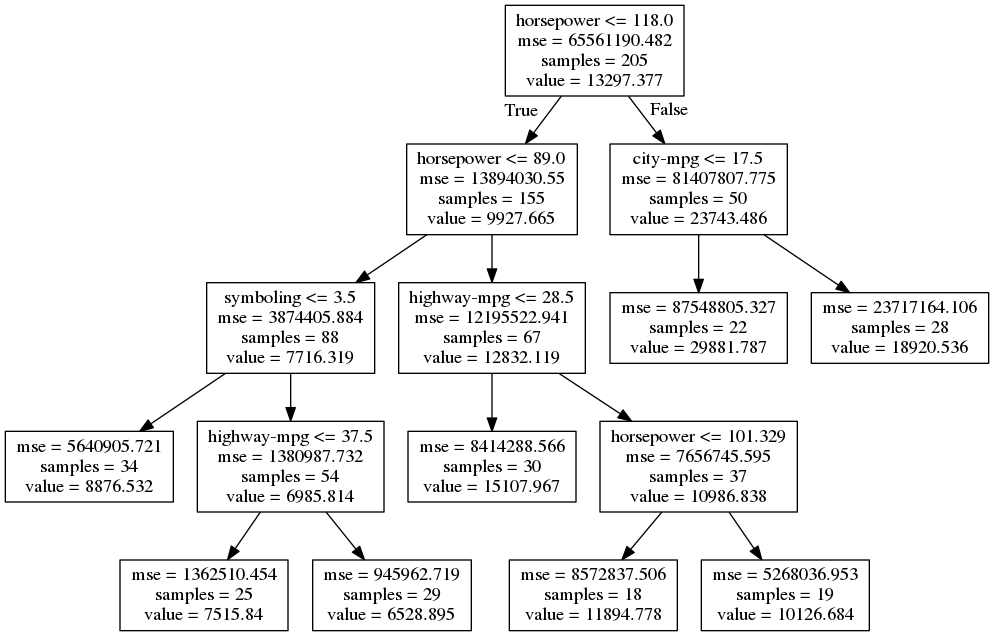

In [42]:
Image("tree2.png")


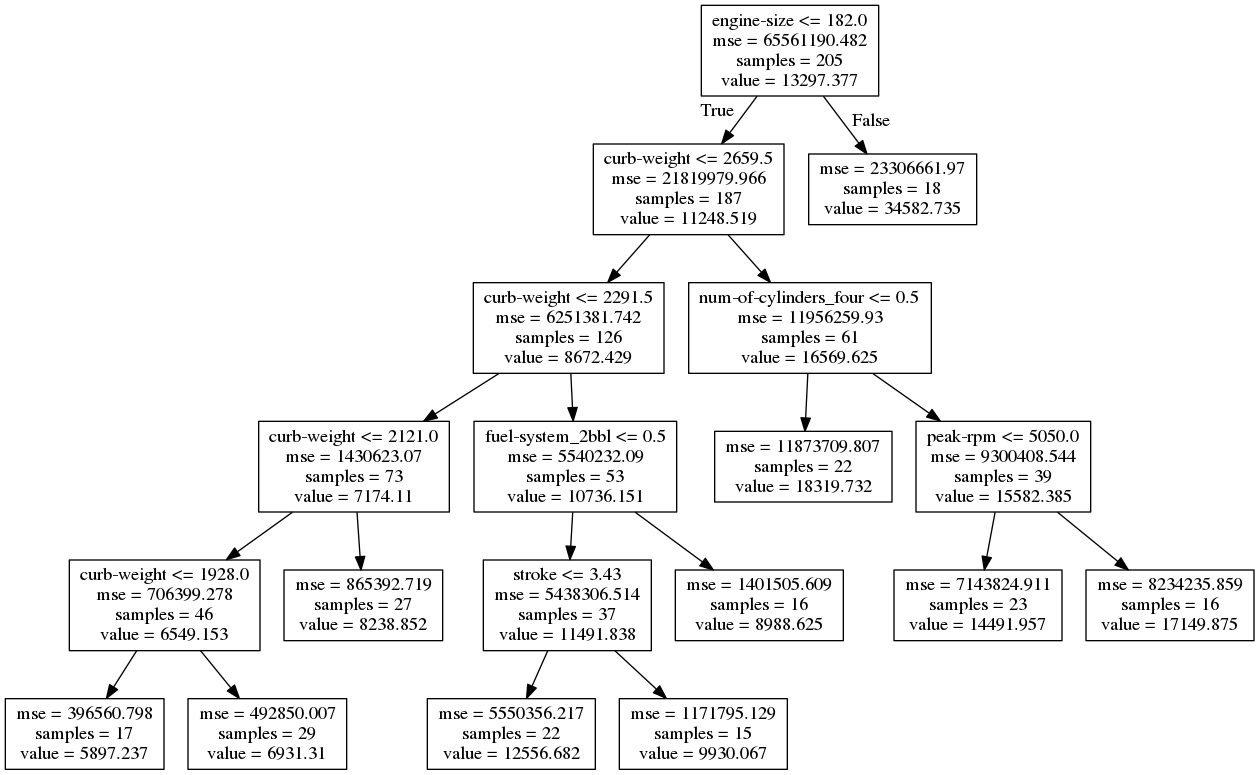

In [43]:
from IPython.display import Image
Image("tree5.png")


For evaluation of different decision trees, and parameterization. MSE was used. which is typical for regression activities. Other evaluation techniques could have been RMSE which is a variant, and the explained variance of R2. I went for the DSR for having meaningful rules to explain to engineering team and recommendation team. with the current state of data it would not be a good idea for going for a complex model, due to the curse of dimensionality. 

I am aware that training on such sparse data might not be accurate, but for the sake of the presentation and the discussion.

For the sake of completeness, checking the principal components of the matrix even if i am not planing to change the dimensions to preserve its meaning.

In [21]:
from sklearn import preprocessing

from sklearn.decomposition import PCA
pca = PCA(n_components=76 )
principalComponents = pca.fit_transform(
preprocessing.StandardScaler().fit(pd.get_dummies(df)).transform(pd.get_dummies(df)))
print(len(pd.get_dummies(df).columns))
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

76
[1.54470296e-01 9.62023315e-02 5.69642526e-02 4.97460164e-02
 4.85634982e-02 3.99544526e-02 3.53765925e-02 3.34566525e-02
 2.94254886e-02 2.70313842e-02 2.61575981e-02 2.59456641e-02
 2.29780807e-02 2.20215529e-02 2.10967763e-02 2.05342314e-02
 1.93800570e-02 1.90825278e-02 1.82195666e-02 1.72452339e-02
 1.65394953e-02 1.58761211e-02 1.45145013e-02 1.39737235e-02
 1.29812227e-02 1.28286057e-02 1.15472100e-02 1.11117746e-02
 1.05617983e-02 9.38554389e-03 8.70140592e-03 7.82502697e-03
 7.32128945e-03 6.55260344e-03 6.21241954e-03 5.80853628e-03
 5.31722003e-03 4.76202811e-03 4.40778145e-03 3.69761252e-03
 3.28304189e-03 3.11441866e-03 2.49705712e-03 2.28180005e-03
 2.13178422e-03 1.90607485e-03 1.64770910e-03 1.49825501e-03
 1.42315894e-03 1.14758720e-03 9.18895717e-04 9.02991498e-04
 7.37067836e-04 6.57473628e-04 5.33462141e-04 5.02679478e-04
 3.28290035e-04 2.46433281e-04 1.81029015e-04 1.51716205e-04
 9.55617876e-05 3.53385393e-05 3.04638943e-32 1.93350345e-33
 1.51941505e-33 6.174

Its Clear that we have redundant dimensions. However, any dimensionality reduction might impair the meaning of the tree. For this use case, dimensionality reduction is not the best to do. On the other hand. for a NN or so its recommended to discard these useless dimensions. 

# Q4 B

Time dimension is crucial for pricing activities, seasonality and price changes are important to be studied. however the current dataset is poor from this perspective. Multiple agent based models, recurrent neural networks or LSTMS, even timeseries analysis models might show a superior performance. As there might be correlation between certain makes or models, but one of them is having a high trading volume, thus we can deduce the probabiilty of the other rising. What we are having here in terms of pricing strongly reasonates with what is called "book" pricing, but there are other aspects of pricing that might be fruitful too.

On the other hand, having insights about the state of the car would be an important measure too. even it sounds far fetched, but having sensors deployed in the car to capture its condition might be a strong indication for the price deviation from the average prices. However, the economic feasibilty of such move is out of the scope of this exercise. 

From the financial point of view of the prices. It might be a good idea to study if the cars market follow the by the book characteristics of the a typical stock/commodity market. Characteristics like heteroskedasticiy of prices and auto correlation of price variance might be a valuable outcome. Also, the behavior of the market regarding the introduction of a new model for a certain make .. shall be studied. The derive of such behavior might be seasonality or some marketing campaigns to some makes, or even bad news like the last VW news, that influence the buying beheavior for a certain make and would definetly contribute to the variance of volume and prices.

Also, it might be a good idea to cluster similar cars with similar features. that might solve the issue of data scarcity of some makes.

Another idea would have been modeling the volume as a poisson process ( I honestly do not know how many cars a certain make sells everymonth .. if it is rare then poission is a valid probabilistic model and lambda is a function of the price, the lower the price the higher the probability of selling the car.. faster.

From a DS point of view, sticking to the current set, recursive elimnation of variables might be a good idea. as we have too few data for such high dimension thus having less meaningfull variables might be a better case.